## Titanic Project
'Titanic: Machine Learning from Disaster' is the first thing you will see in the kaggle competition. This dataset is also widely used as an introductory example for machine learning online courses. <br><br> For those who are interested in doing by themselves, the dataset could be easily found here: https://www.kaggle.com/c/titanic/data

Let's take a look at the data description.
### Description of the dataset
The data has been split into two groups:
- training set (train.csv)
- test set (test.csv)

#### Variable Table
| Variable |                 Definition                 |                       Key                      |
|:--------:|:------------------------------------------:|:----------------------------------------------:|
| survival |                  Survival                  |                 0 = No, 1 = Yes                |
|  pclass  |                Ticket class                |            1 = 1st, 2 = 2nd, 3 = 3rd           |
|    sex   |                     Sex                    |                                                |
|    age   |                Age in years                |                                                |
|   sibsp  | # of siblings / spouses aboard the Titanic |                                                |
|   parch  | # of parents / children aboard the Titanic |                                                |
|  ticket  |                Ticket number               |                                                |
|   fare   |               Passenger fare               |                                                |
|   cabin  |                Cabin number                |                                                |
| embarked |             Port of Embarkation            | C = Cherbourg, Q = Queenstown, S = Southampton |

#### Variable Notes

>pclass: Levels for socio-economic status
>> 1st = Upper<br>
>> 2nd = Middle<br>
>> 3rd = Lower

>age: Age is fractional if less than 1

>sibsp: The dataset defines family relations as <br>
>>Sibling = brother, sister, stepbrother, stepsister<br>
>>Spouse = husband, wife (mistresses and fiancés were ignored)

>parch: The dataset defines family relations as <br>
>>Parent = mother, father <br>
>>Child = daughter, son, stepdaughter, stepson<br>
>> * Some children travelled only with a nanny, therefore parch=0 for them.

### The Objective
We are tasked to analyze what sorts of people were likely to survive and to predict which passengers survived the tragedy applying the tools of machine learning.

In [1]:
%matplotlib inline  
%config InlineBackend.figure_format='retina'

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import matplotlib.pyplot as plt
plt.style.use('ggplot')

Last time, we finished filling in the missing values and adjusted for multiple countings in ```Fare``` column. <br><br>
Recall that our objective is to accurately predict if passengers in testing set had survived or not. So, let's focus on the relationship between the predictors and the response variable.

In [2]:
train_set = pd.read_csv('cleaned_train.csv')
test_set = pd.read_csv('cleaned_test.csv')
dataset = [train_set, test_set]

In [3]:
train_set.describe()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived,Count
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,29.215679,14.551089,0.381594,446.000000,2.308642,0.523008,0.383838,2.121212
std,13.562969,13.575057,0.806057,257.353842,0.836071,1.102743,0.486592,1.796660
min,0.420000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
25%,21.000000,7.495800,0.000000,223.500000,2.000000,0.000000,0.000000,1.000000
50%,26.000000,8.050000,0.000000,446.000000,3.000000,0.000000,0.000000,1.000000
75%,36.750000,13.825000,0.000000,668.500000,3.000000,1.000000,1.000000,3.000000
max,80.000000,128.082300,6.000000,891.000000,3.000000,8.000000,1.000000,11.000000


Based on the descriptive statistic of each variables, let's define different segmentations of passengers and see if there are significant differences among groups. <br>
> Different ```Age``` groups are defined based on age range <br><br>
> Four different ```Fare``` groups are defined as Low, Mid-Low, Mid-High, and High <br><br>
> To estimate the family size, variables ```Parch``` and ```SibSp``` are combined as ```GroupSize``` <br><br>

In [4]:
def AgeGroup(df):
    age = df.Age
    
    if age in range(0,7):
        return 'Preschool'
    elif age in range(7,13):
        return 'GradeSchool'
    elif age in range(13,19):
        return 'Teen'
    elif age in range(19,22):
        return 'YoungAdult'
    elif age in range(22,64):
        return 'Adult'
    else:
        return 'Senior'

def FareGroup(df):
    fare = df.Fare
    
    if fare <= 7.4958:
        return 'Low'
    elif (fare > 7.4958) & (fare < 8.05):
        return 'Mid-Low'
    elif (fare >= 8.05) & (fare < 13.825):
        return 'Mid-High'
    else:
        return 'High'

for data in dataset:
    data['AgeGroup'] = data.apply(AgeGroup, axis = 1)
    data['FareGroup'] = data.apply(FareGroup, axis = 1)
    data['GroupSize'] = data.Parch + data.SibSp + 1
    data.drop(['Age','Parch','SibSp'], axis = 1, inplace = True)

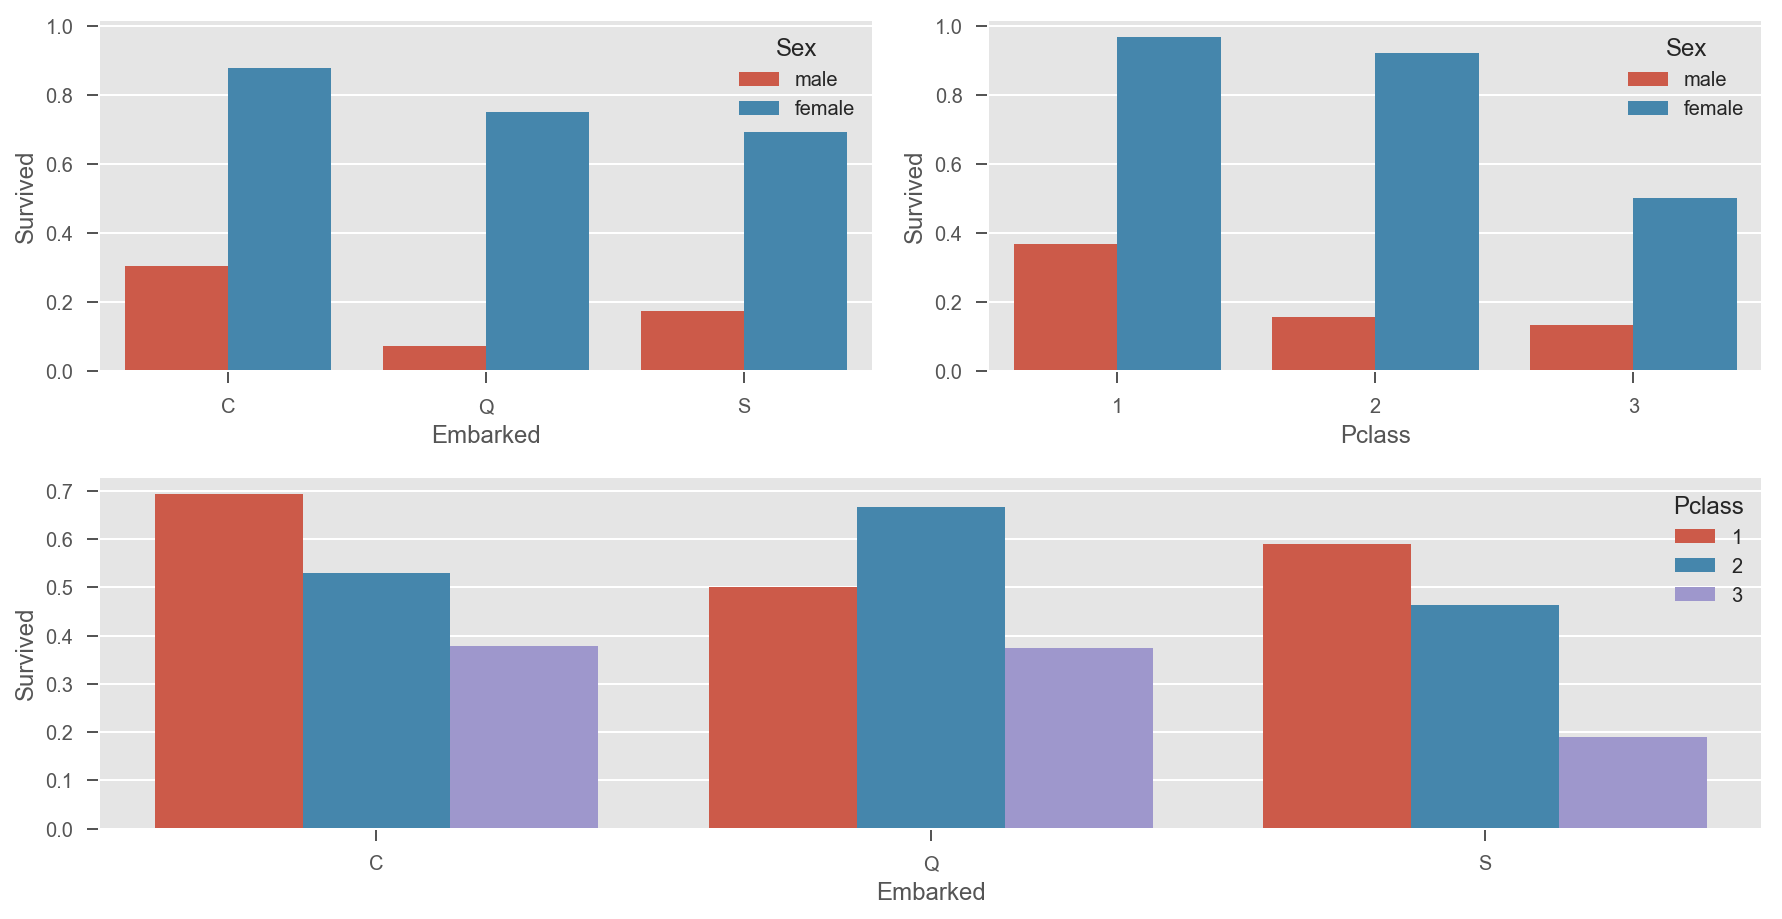

In [5]:
plt.figure(figsize = (12.5,6.5))
ax1 = plt.subplot(2,2,1)
sns.barplot(x = 'Embarked', y = 'Survived', data = train_set, hue = 'Sex', ci = None, order = ['C','Q','S'])
ax2 = plt.subplot(2,2,2, sharey=ax1)
sns.barplot(x = 'Pclass', y = 'Survived', data = train_set, hue = 'Sex', ci = None, order = [1,2,3])
ax3 = plt.subplot(2,2,(3,4))
sns.barplot(x = 'Embarked', y = 'Survived', data = train_set, hue = 'Pclass', ci = None, order = ['C','Q','S'])
plt.tight_layout()

In [6]:
train_set.groupby(['Embarked','Pclass','Sex']).mean()

Fare  PassengerId  Survived     Count  GroupSize
Embarked Pclass Sex                                                          
C        1      female  38.961930   423.627907  0.976744  2.906977   1.813953
                male    39.401689   458.380952  0.404762  2.095238   1.571429
         2      female  12.496429   467.000000  1.000000  2.142857   2.285714
                male    13.279337   428.500000  0.200000  2.000000   2.000000
         3      female   6.369055   453.869565  0.652174  2.434783   2.391304
                male     7.128399   450.209302  0.232558  1.348837   1.372093
Q        1      female  30.000000   413.000000  1.000000  3.000000   2.000000
                male    30.000000   246.000000  0.000000  3.000000   3.000000
         2      female  12.350000   313.500000  1.000000  1.000000   1.000000
                male    12.350000   627.000000  0.000000  1.000000   1.000000
         3      female   7.675384   376.636364  0.727273  1.393939   1.454545
                male     7.416986   457.333333  0.076923  1.769231   1.717949
S        1      female  32.848772   509.540000  0.960000  2.920000   2.180000
                male    28.790712   456.974684  0.354430  1.721519   1.582278
         2      female  11.334328   444.477612  0.910448  2.014925   2.104478
                male    10.716796   448.123711  0.154639  1.907216   1.525773
         3      female   6.939946   394.238636  0.375000  3.102273   3.238636
                male     7.529658   456.109434  0.128302  1.996226   1.781132

By observation, <br>
1) Nearly every female first and second class passengers have survived, but the survival rate is significantly lower for third class female passengers <br><br>
2) The higher the socio-economic status is, the greater probability of survival <br><br>
3) Port of embarkation matters : P(Survive|Cherbourg) > P(Survive|Queenstown) > P(Survive|Southampton) <br>
> i) Maybe for those who embarked at Cherbourg takes the room closer to the exits? <br><br>
> ii) Second class passengers who embarked at Queenstown have the highest probabiity of survival? <br>
>> However, there are only 2 and 3, first and second class passengers, respectively, who embarked at Queenstown. Most of the passengers who embarked at Queenstown are third class passengers. So, it is difficult to generalize the survival probability of first and second class passengers those embarked at Queenstown.

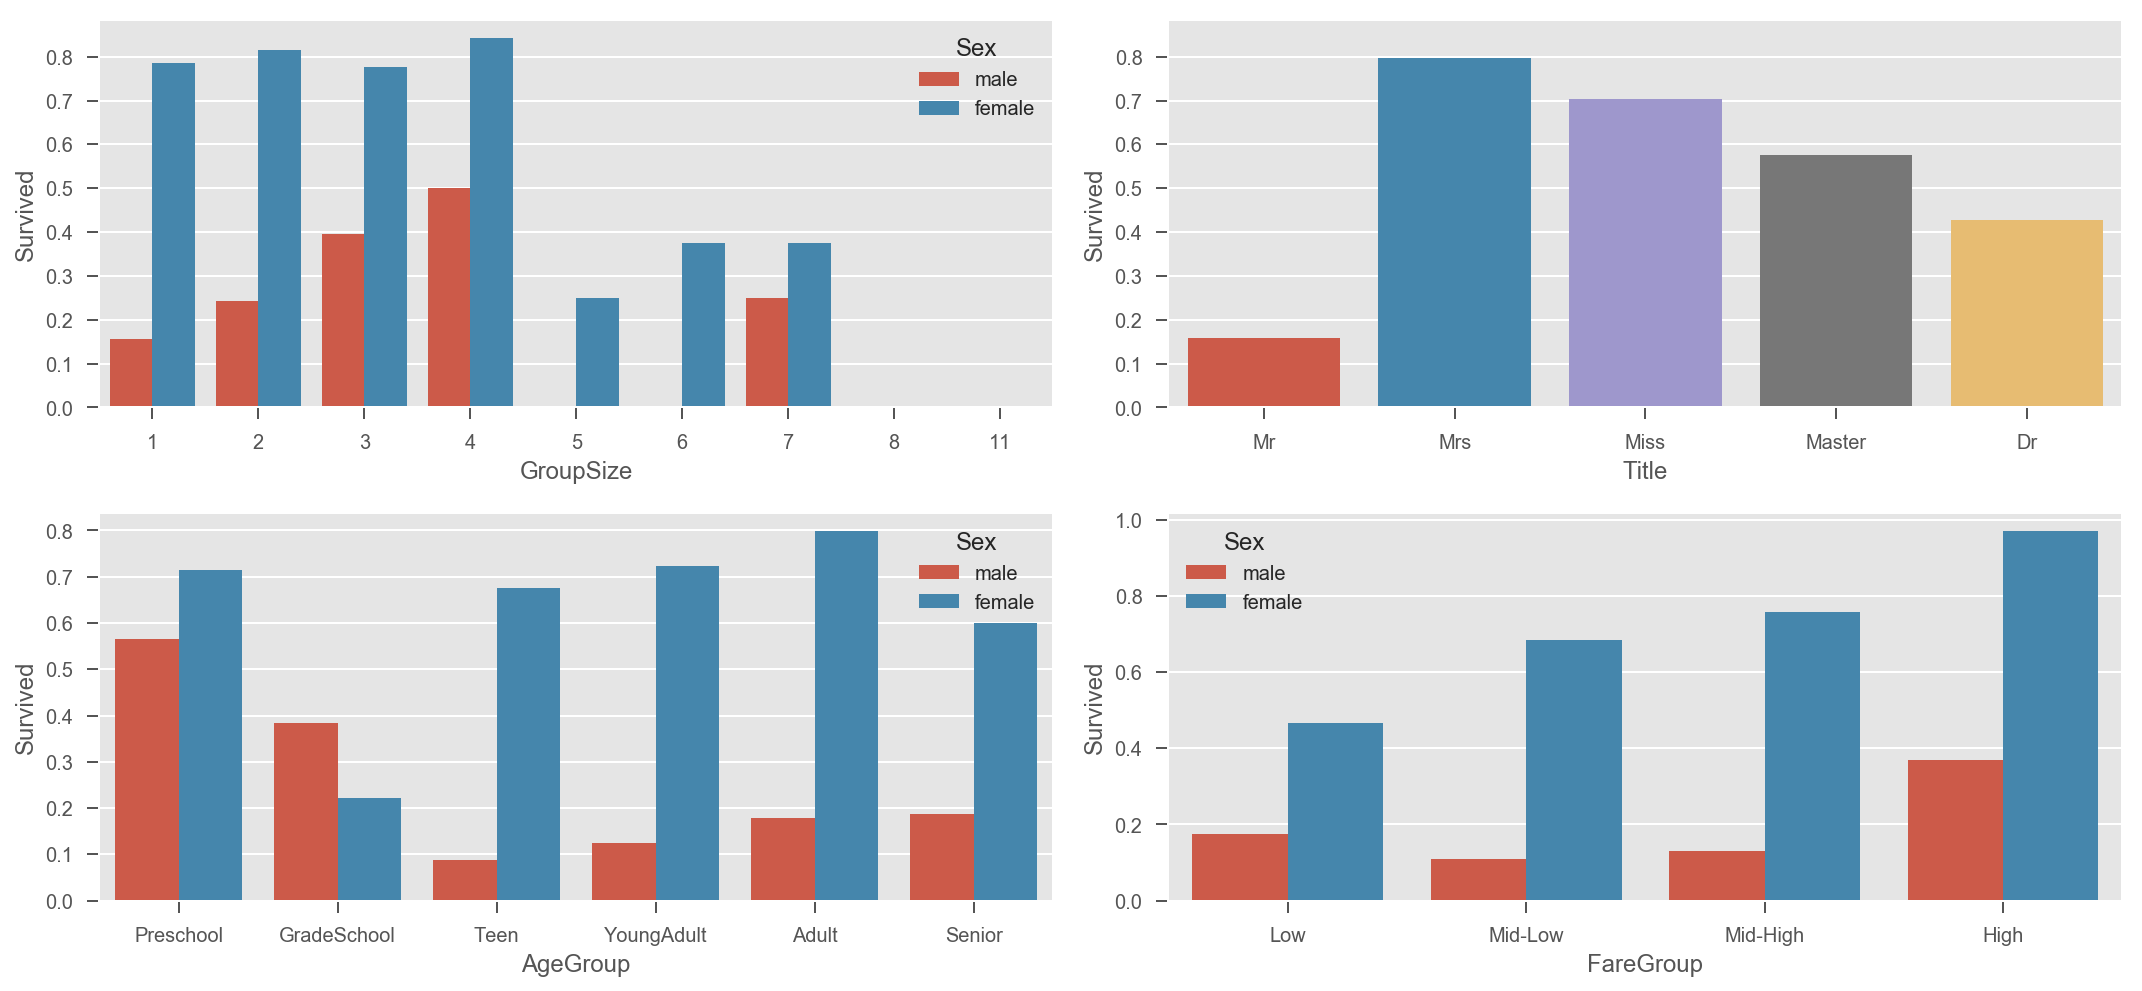

In [7]:
plt.figure(figsize = (15,7))
ax1 = plt.subplot(221)
sns.barplot(x = 'GroupSize', y = 'Survived', hue = 'Sex', data = train_set, ci = None)
ax2 = plt.subplot(222, sharey = ax1)
sns.barplot(x = 'Title', y = 'Survived', data = train_set, ci = None)
ax3 = plt.subplot(223)
order = ['Preschool', 'GradeSchool', 'Teen', 'YoungAdult','Adult','Senior']
sns.barplot(x = 'AgeGroup', y = 'Survived', hue = 'Sex', data = train_set, ci = None, order = order)
ax4 = plt.subplot(224)
order = ['Low','Mid-Low','Mid-High','High']
sns.barplot(x = 'FareGroup', y = 'Survived', data = train_set, hue = 'Sex', ci = None, order = order)
plt.tight_layout()

1) Survival rates for groups larger than four are much lower than that for smaller groups. <br>
> None of the male passengers within ```GroupSize``` 5 and 6 have survived. <br>
> No passengers within ```GroupSize``` 8 and 11 survived. <br>

2) Among male passengers, kids (preschoolers and gradeschoolers) have significantly higher probability than the rest. <br>
3) Among female passengers, gradeschoolers have significantly lower probability than the rest. <br>
4) Among different ```Fare``` groups, passengers who paid higher ```Fare``` have significantly higher probability of survival. The rest of the groups have similar survival rates.

In [8]:
train_set.to_csv('new_train.csv',sep = ',', index = False)
test_set.to_csv('new_test.csv', sep = ',', index = False)